In [1]:
#数据集描述:数据来源于和鲸社区的一份超市销售额数据,为csv格式,
# 分为订单、退货、销售人员三个工作表,本项目为数据销售额分析,所以只取订单和销售人员这两个工作表.

In [2]:
#1 导入相关模块
import pandas  as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
#2 读取数据并探索数据
data1 = pd.read_excel('商城详细销售数据.xls',sheet_name='订单')
data2 = pd.read_excel('商城详细销售数据.xls',sheet_name='销售人员')

In [4]:
#查看数据维度
data1.shape

(9959, 20)

In [5]:
data2.shape

(6, 2)

In [6]:
#查看数据初步情况
data1.head()

,行 ID,订单 ID,订单日期,发货日期,邮寄方式,客户 ID,客户名称,细分,城市,省/自治区,国家,地区,产品 ID,类别,子类别,产品名称,销售额,数量,折扣,利润
0,1,US-2018-1357144,2018-04-27,2018-04-29,二级,曾惠-14485,曾惠,公司,杭州,浙江,中国,华东,办公用-用品-10002717,办公用品,用品,"Fiskars 剪刀, 蓝色",129.696,2,0.4,-60.704
1,2,CN-2018-1973789,2018-06-15,2018-06-19,标准级,许安-10165,许安,消费者,内江,四川,中国,西南,办公用-信封-10004832,办公用品,信封,"GlobeWeis 搭扣信封, 红色",125.440,2,0.0,42.560
2,3,CN-2018-1973789,2018-06-15,2018-06-19,标准级,许安-10165,许安,消费者,内江,四川,中国,西南,办公用-装订-10001505,办公用品,装订机,"Cardinal 孔加固材料, 回收",31.920,2,0.4,4.200
3,4,US-2018-3017568,2018-12-09,2018-12-13,标准级,宋良-17170,宋良,公司,镇江,江苏,中国,华东,办公用-用品-10003746,办公用品,用品,"Kleencut 开信刀, 工业",321.216,4,0.4,-27.104
4,5,CN-2017-2975416,2017-05-31,2017-06-02,二级,万兰-15730,万兰,消费者,汕头,广东,中国,中南,办公用-器具-10003452,办公用品,器具,"KitchenAid 搅拌机, 黑色",1375.920,3,0.0,550.200


In [7]:
data2.head()

,地区,地区经理
0,东北,楚杰
1,中南,范彩
2,华东,洪光
3,华北,殷莲
4,西北,杨健


In [8]:
#对data1进行处理,删除掉没用的指标
data3 = data1.drop(['行 ID', '客户 ID', '产品 ID','产品名称'],axis=1)
data3.head()

,订单 ID,订单日期,发货日期,邮寄方式,客户名称,细分,城市,省/自治区,国家,地区,类别,子类别,销售额,数量,折扣,利润
0,US-2018-1357144,2018-04-27,2018-04-29,二级,曾惠,公司,杭州,浙江,中国,华东,办公用品,用品,129.696,2,0.4,-60.704
1,CN-2018-1973789,2018-06-15,2018-06-19,标准级,许安,消费者,内江,四川,中国,西南,办公用品,信封,125.440,2,0.0,42.560
2,CN-2018-1973789,2018-06-15,2018-06-19,标准级,许安,消费者,内江,四川,中国,西南,办公用品,装订机,31.920,2,0.4,4.200
3,US-2018-3017568,2018-12-09,2018-12-13,标准级,宋良,公司,镇江,江苏,中国,华东,办公用品,用品,321.216,4,0.4,-27.104
4,CN-2017-2975416,2017-05-31,2017-06-02,二级,万兰,消费者,汕头,广东,中国,中南,办公用品,器具,1375.920,3,0.0,550.200


In [9]:
data3.shape

(9959, 16)

In [10]:
#将数据进行合并,就是data3与data2
df = pd.merge(data3,data2,how='left',left_on='地区',right_on='地区')

In [11]:
df.head()

,订单 ID,订单日期,发货日期,邮寄方式,客户名称,细分,城市,省/自治区,国家,地区,类别,子类别,销售额,数量,折扣,利润,地区经理
0,US-2018-1357144,2018-04-27,2018-04-29,二级,曾惠,公司,杭州,浙江,中国,华东,办公用品,用品,129.696,2,0.4,-60.704,洪光
1,CN-2018-1973789,2018-06-15,2018-06-19,标准级,许安,消费者,内江,四川,中国,西南,办公用品,信封,125.440,2,0.0,42.560,白德伟
2,CN-2018-1973789,2018-06-15,2018-06-19,标准级,许安,消费者,内江,四川,中国,西南,办公用品,装订机,31.920,2,0.4,4.200,白德伟
3,US-2018-3017568,2018-12-09,2018-12-13,标准级,宋良,公司,镇江,江苏,中国,华东,办公用品,用品,321.216,4,0.4,-27.104,洪光
4,CN-2017-2975416,2017-05-31,2017-06-02,二级,万兰,消费者,汕头,广东,中国,中南,办公用品,器具,1375.920,3,0.0,550.200,范彩


In [12]:
df.shape

(9959, 17)

In [14]:
#查看缺失值
df.isnull().sum()

订单 ID    0
订单日期     0
发货日期     0
邮寄方式     0
客户名称     0
细分       0
城市       0
省/自治区    0
国家       0
地区       0
类别       0
子类别      0
销售额      0
数量       0
折扣       0
利润       0
地区经理     0
dtype: int64

#由此可知数据没有缺失

In [15]:
#查看空值情况
df.isna().sum()

订单 ID    0
订单日期     0
发货日期     0
邮寄方式     0
客户名称     0
细分       0
城市       0
省/自治区    0
国家       0
地区       0
类别       0
子类别      0
销售额      0
数量       0
折扣       0
利润       0
地区经理     0
dtype: int64

也没有空值

In [16]:
#随机取10个样
df.sample(10)

,订单 ID,订单日期,发货日期,邮寄方式,客户名称,细分,城市,省/自治区,国家,地区,类别,子类别,销售额,数量,折扣,利润,地区经理
5628,US-2016-3360468,2016-08-04,2016-08-09,标准级,严盛,消费者,宁波,浙江,中国,华东,办公用品,信封,420.420,3,0.0,21.000,洪光
9125,CN-2017-4862116,2017-11-21,2017-11-27,标准级,许凤,公司,本溪,辽宁,中国,东北,办公用品,用品,495.180,5,0.4,-50.120,楚杰
2637,US-2016-5037027,2016-12-20,2016-12-24,二级,周木兰,消费者,呼和浩特,内蒙古,中国,华北,办公用品,系固件,92.904,2,0.4,-10.976,殷莲
9238,CN-2015-4448319,2015-07-18,2015-07-23,标准级,陈晨,公司,汕头,广东,中国,中南,办公用品,装订机,411.180,3,0.0,7.980,范彩
9332,US-2018-5448418,2018-08-03,2018-08-09,标准级,夏光,消费者,淮南,安徽,中国,华东,办公用品,装订机,225.960,1,0.0,54.180,洪光
9512,US-2018-1389726,2018-09-09,2018-09-14,二级,徐君,消费者,广水,湖北,中国,中南,办公用品,美术,442.008,9,0.8,-1614.312,范彩
5129,CN-2015-5308381,2015-12-02,2015-12-07,二级,田谙,消费者,南宁,广西,中国,中南,办公用品,器具,312.340,1,0.0,146.720,范彩
7372,US-2017-2252147,2017-05-11,2017-05-15,标准级,薛君,消费者,杭州,浙江,中国,华东,技术,设备,2033.136,6,0.4,-170.184,洪光
5444,CN-2018-1374105,2018-03-19,2018-03-23,标准级,黄磊,消费者,张家口,河北,中国,华北,家具,书架,5514.460,7,0.0,661.500,殷莲
9046,CN-2018-4439307,2018-02-27,2018-02-28,一级,佘平,消费者,雄州,广东,中国,中南,技术,复印机,6302.380,7,0.0,2394.140,范彩


In [17]:
#基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9959 entries, 0 to 9958
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单 ID   9959 non-null   object        
 1   订单日期    9959 non-null   datetime64[ns]
 2   发货日期    9959 non-null   datetime64[ns]
 3   邮寄方式    9959 non-null   object        
 4   客户名称    9959 non-null   object        
 5   细分      9959 non-null   object        
 6   城市      9959 non-null   object        
 7   省/自治区   9959 non-null   object        
 8   国家      9959 non-null   object        
 9   地区      9959 non-null   object        
 10  类别      9959 non-null   object        
 11  子类别     9959 non-null   object        
 12  销售额     9959 non-null   float64       
 13  数量      9959 non-null   int64         
 14  折扣      9959 non-null   float64       
 15  利润      9959 non-null   float64       
 16  地区经理    9959 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(1

In [18]:
#基本描述性统计
df.describe()

,销售额,数量,折扣,利润
count,9959.000000,9959.000000,9959.000000,9959.000000
mean,1613.510807,3.768852,0.106406,215.638008
std,2641.237786,2.236739,0.187477,858.710532
min,13.440000,1.000000,0.000000,-7978.320000
25%,250.460000,2.000000,0.000000,7.756000
50%,636.300000,3.000000,0.000000,74.200000
75%,1785.210000,5.000000,0.200000,277.200000
max,35621.355000,14.000000,0.800000,10108.280000


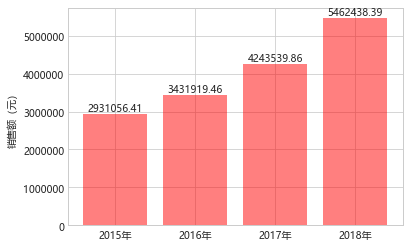

In [24]:
# 3 销售额分析
#根据年份分析销售额的跌涨情况
plt.style.use('seaborn-whitegrid')
plt.rc('font', **{'family': 'Microsoft YaHei, SimHei'})  # 设置中文字体的支持
sales_year = df['销售额'].groupby(df['订单日期'].dt.year).sum()
plt.bar(sales_year.index,height=sales_year.values,width=0.8,alpha = 0.5,color = 'r')
plt.xticks(sales_year.index,labels=['2015年','2016年','2017年','2018年'])
plt.ylabel('销售额（元）')
for a,b in zip(sales_year.index,sales_year.values): # 添加数据标签
    plt.text(a, b+0.05,'%.2f' % b,ha='center', va= 'bottom',fontsize=10)

#由此可见销售额是逐渐增加的,涨幅变化有小有大

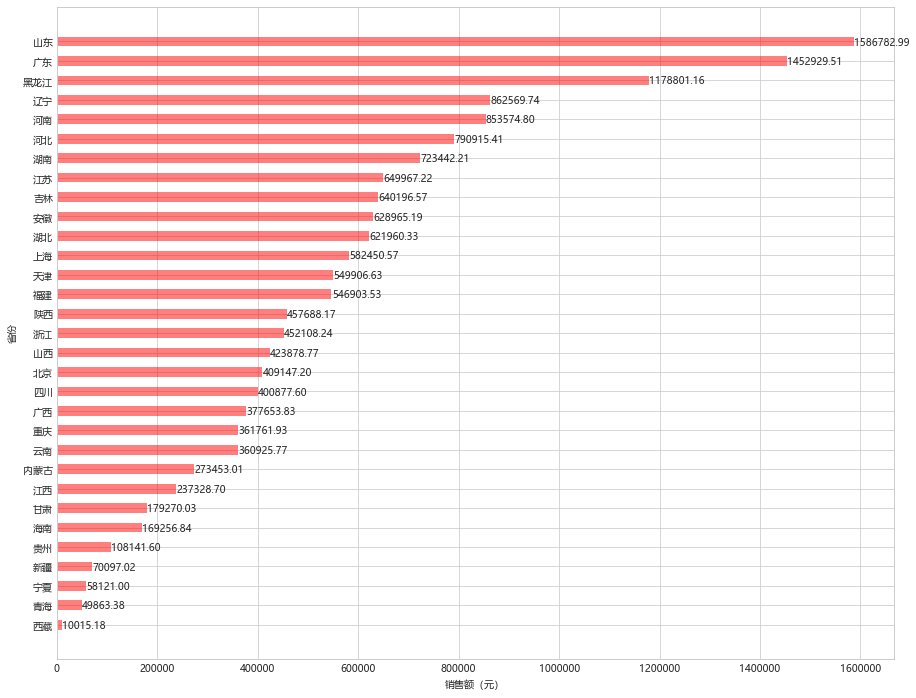

In [26]:
#查看不同省份销售额贡献情况
sales_pro= df['销售额'].groupby(df['省/自治区']).sum().sort_values()
plt.figure(figsize=(15,12))#创建画布
plt.barh(sales_pro.index,width=sales_pro.values,height=0.5,alpha = 0.5,color = 'r')
plt.ylabel('省份')
plt.xlabel('销售额（元）')
for y, x in enumerate(sales_pro.values):# 数据标签 返回 enumerate(枚举) 对象。
    plt.text(x+500, y-0.2, "%.2f" %x)

#由此可得销售额贡献前五 分别为 山东、广东、黑龙江、辽宁、河南,其中销售额明显较大 的为山东、广东、黑龙江,将此列为第一梯队

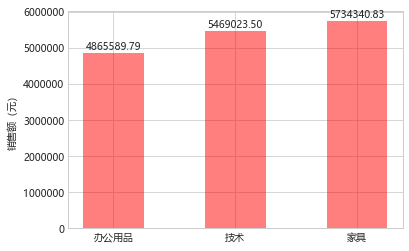

In [29]:
#查看不同类别的销售额贡献情况
sales_kind= df['销售额'].groupby(df['类别']).sum().sort_values()
plt.bar(sales_kind.index,height=sales_kind.values,width=0.5,alpha = 0.5,color = 'r')
plt.ylabel('销售额（元）')
for a,b in zip(sales_kind.index,sales_kind.values): # 添加数据标签
    plt.text(a, b+0.05,'%.2f' % b, ha='center',va= 'bottom',fontsize=10)

#由此可得 家具与技术的销售额相对较高,差距较小,而办公用品的销售额相对较低

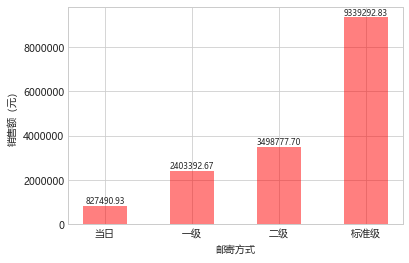

In [33]:
#查看不同邮寄方式销售额贡献情况
sales_w= df['销售额'].groupby(df['邮寄方式']).sum().sort_values()
plt.bar(sales_w.index,height=sales_w.values,width=0.5,alpha = 0.5,color = 'r')
plt.ylabel('销售额（元）')
plt.xlabel("邮寄方式")
for a,b in zip(sales_w.index,sales_w.values): # 添加数据标签
    plt.text(a, b+0.05,'%.2f' % b, ha='center',va= 'bottom',fontsize=8)

#由此可得邮寄方式为标准级的销售额较大

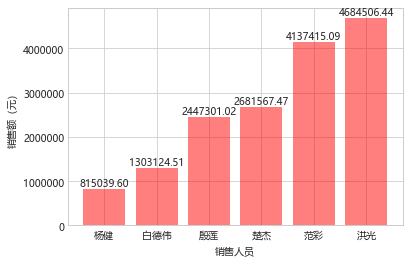

In [37]:
#查看不同业务员的销售额贡献
sales_man= df['销售额'].groupby(df['地区经理']).sum().sort_values()
plt.bar(sales_man.index,height=sales_man.values,width=0.8,alpha = 0.5,color = 'r')
plt.ylabel('销售额（元）')
plt.xlabel("销售人员")
for a,b in zip(sales_man.index,sales_man.values): # 添加数据标签
    plt.text(a, b+0.05,'%.2f' % b, ha='center',va= 'bottom',fontsize=10)

In [38]:
#由此可得洪光、范彩对销售额贡献较大，其次是楚杰和殷莲

In [39]:
#4 利润额分析

Text(0.5, 0, '销售额（元）')

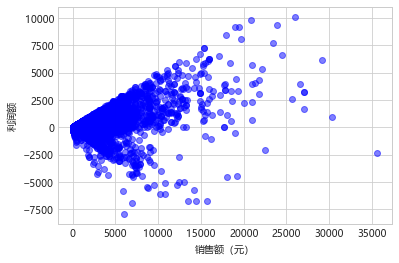

In [50]:
#绘制散点图查看销售额与利润额之间是否存在线性关系
plt.scatter(x=df['销售额'],y=df['利润'],alpha=0.5,color = 'b')
plt.ylabel('利润额')
plt.xlabel('销售额（元）')

#由此可显示存在线性关系,在利润额为0的左右,发生不同k值的线性关系

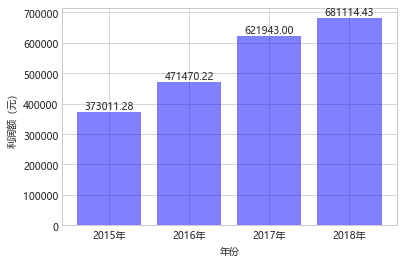

In [51]:
#查看利润额随年份的变化关系
prf = df['利润'].groupby(df['订单日期'].dt.year).sum()
plt.bar(prf.index,height=prf.values,width=0.8,alpha = 0.5,color = 'b')
plt.xticks(prf.index,labels=['2015年','2016年','2017年','2018年'])
plt.ylabel('利润额（元）')
plt.xlabel("年份")
for a,b in zip(prf.index,prf.values): # 添加数据标签
    plt.text(a, b+0.05, 
             '%.2f' % b, 
             ha='center',
             va= 'bottom',
             fontsize=10)

#由此可得利润额也是逐年增长

Text(0.5, 0, '利润额（元）')

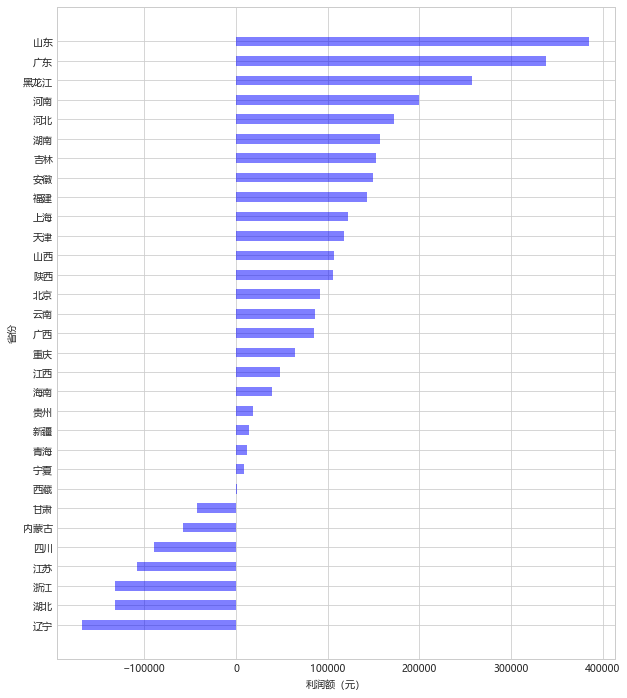

In [52]:
#查看各省利润额贡献情况
prf_p= df['利润'].groupby(df['省/自治区']).sum().sort_values()
plt.figure(figsize=(10,12))
plt.barh(prf_p.index,width=prf_p.values,height=0.5,alpha = 0.5,color = 'b')
plt.ylabel('省份')
plt.xlabel('利润额（元）')

#由此可得利润额前五的省份分别为山东、广东、黑龙江、河南、河北,和销售额前五不同

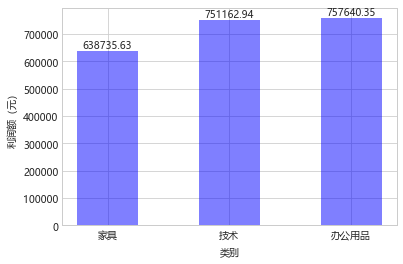

In [58]:
# 不同类别利润额贡献情况
prf_kind= df['利润'].groupby(df['类别']).sum().sort_values()
plt.bar(prf_kind.index,height=prf_kind.values,width=0.5,alpha = 0.5,color = 'b')
plt.ylabel('利润额（元）')
plt.xlabel("类别")
for a,b in zip(prf_kind.index,prf_kind.values): # 添加数据标签
    plt.text(a, b+0.05,'%.2f' % b, ha='center',va= 'bottom',fontsize=10)

#利润额和销售额的情况相反 办公用品销售额少,但是利润额却很大 

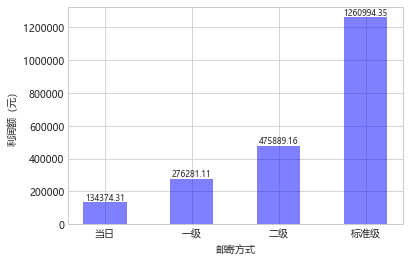

In [59]:
#查看不同邮寄方式的利润额贡献情况
prf_t= df['利润'].groupby(df['邮寄方式']).sum().sort_values()
plt.bar(prf_t.index,height=prf_t.values,width=0.5,alpha = 0.5,color = 'b')
plt.ylabel('利润额（元）')
plt.xlabel("邮寄方式")
for a,b in zip(prf_t.index,prf_t.values): # 添加数据标签
    plt.text(a, b+0.05,'%.2f' % b, ha='center',va= 'bottom',fontsize=8)

#标准级的利润额最大

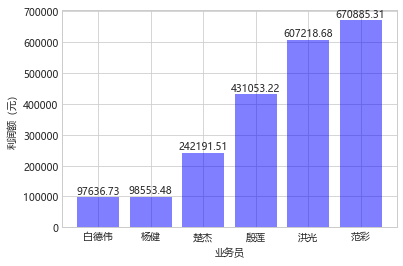

In [60]:
#查看不同业务员的利润贡献情况
prf_man= df['利润'].groupby(df['地区经理']).sum().sort_values()
plt.bar(prf_man.index,height=prf_man.values,width=0.8,alpha = 0.5,color = 'b')
plt.ylabel('利润额（元）')
plt.xlabel("业务员")
for a,b in zip(prf_man.index,prf_man.values): # 添加数据标签
    plt.text(a, b+0.05,'%.2f' % b, ha='center',va= 'bottom',fontsize=10)


#利润额 前二依旧是销售额前二,但是第三有出入

In [61]:
#4 交叉分析
# 省、类别、销售额交叉透视表
tem = pd.pivot_table(data=df,values=['销售额'],index=['省/自治区'],columns=['类别'],aggfunc='sum')
tem


销售额                        
类别           办公用品          家具          技术
省/自治区                                    
上海     197696.660  180672.128  204081.780
云南      93548.700  150029.292  117347.776
内蒙古    114192.176   81139.072   78121.764
北京     146253.800  153248.760  109644.640
吉林     119124.936  222790.995  298280.640
四川     114141.496  154172.424  132563.676
天津     143225.320  175788.130  230893.180
宁夏      34221.600   11772.740   12126.660
安徽     192031.560  199013.010  237920.620
山东     490581.280  554029.448  542172.260
山西     116742.360  210221.830   96914.580
广东     408478.700  549830.953  494619.860
广西     123174.604  126929.285  127549.940
新疆      45413.760   16990.680    7692.580
江苏     237378.876  248590.020  163998.324
江西      45201.520  126234.780   65892.400
河北     225399.860  299346.145  266169.400
河南     228759.076  282253.223  342562.500
浙江     145678.316  137580.352  168849.576
海南      59184.776   62929.055   47143.012
湖北     220619.224  156241.960  245099.148
湖南     250176.724  246923.565  226341.920
甘肃      42723.772   68214.440   68331.816
福建     100060.380  230104.392  216738.760
西藏       7175.700    2839.480         NaN
贵州      33676.300   37716.140   36749.160
辽宁     307603.744  280670.096  274295.896
重庆      79668.540  131596.556  150496.836
陕西     129221.680  194620.468  133846.020
青海      16289.980   24614.100    8959.300
黑龙江    397944.372  417237.310  363619.480

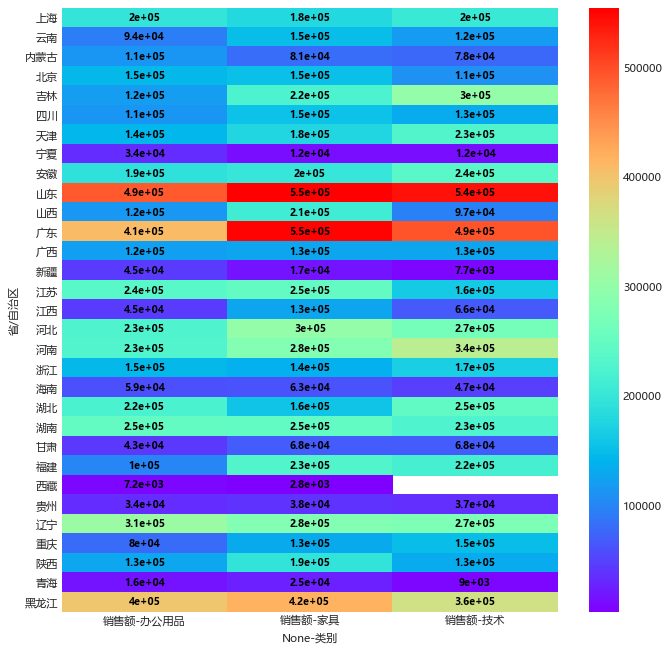

In [62]:
#绘制热力图查看
plt.figure(figsize=(10,10), dpi= 80)
#cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(tem,annot=True,annot_kws={'size':9,'weight':'bold', 'color':'black'},cmap='rainbow')
plt.show()

In [63]:
# 省份、类别、利润交叉透视表
tem1 = pd.pivot_table(data=df,values=['利润'],index=['省/自治区'],columns=['类别'],aggfunc='sum')
tem1

利润                        
类别           办公用品          家具          技术
省/自治区                                    
上海      35229.460   40216.428   46204.200
云南      20973.820   42095.592   23569.756
内蒙古    -15815.184  -24077.928  -17814.776
北京      24618.860   42062.580   25280.500
吉林      26063.436   50022.735   76972.000
四川      -6415.164  -45722.796  -37349.564
天津      38900.960   27610.170   51192.960
宁夏       7177.100   -2732.380    4092.900
安徽      43450.120   44779.210   60799.480
山东     128908.920  123901.988  132652.100
山西      27574.540   54483.030   25005.820
广东      97420.260  120960.133  119614.600
广西      31990.644   18530.085   34203.540
新疆      10644.200    1118.600    2843.260
江苏       1968.176  -76255.340  -33315.856
江西       8801.660   22714.580   16290.820
河北      61986.680   48722.625   61322.380
河南      40575.696   55416.543  103536.440
浙江     -24613.064  -53659.088  -53456.844
海南      12818.176   12201.875   14702.072
湖北     -20040.496  -47230.260  -64761.592
湖南      61279.764   44644.285   50811.880
甘肃       -190.708  -25144.420  -17347.064
福建      21840.420   61755.652   59005.660
西藏        908.040     358.540         NaN
贵州       8217.300    6644.540    4136.580
辽宁     -25614.736  -67684.064  -74739.924
重庆      21359.660   20986.756   22085.336
陕西      27876.800   45376.128   32561.760
青海       4126.080    6285.860    1865.360
黑龙江     85618.932   90353.970   81199.160

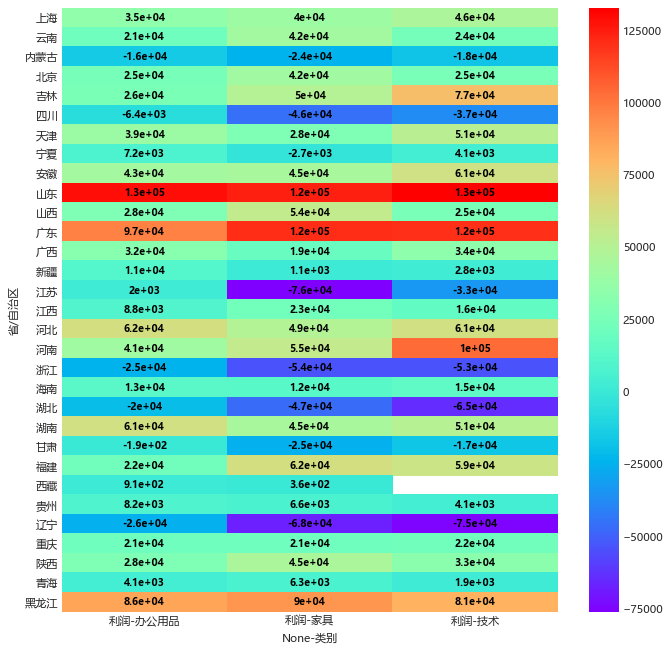

In [64]:
#热力图
plt.figure(figsize=(10,10), dpi= 80)
sns.heatmap(tem1,annot=True,annot_kws={'size':9,'weight':'bold', 'color':'black'},cmap='rainbow')
plt.show()

In [65]:
# 销售额、利润额、业务员交叉透视表
tem2 = pd.pivot_table(data=df,values=['销售额','利润'],index=['类别','地区经理'],aggfunc='sum')
tem2

利润          销售额
类别   地区经理                         
办公用品 杨健     49633.472   267870.792
     楚杰     86067.632   824673.052
     殷莲    137265.856   745813.516
     洪光    215585.692  1408628.592
     白德伟    49272.216   347692.576
     范彩    219815.484  1270911.264
家具   杨健     24903.788   316212.428
     楚杰     72692.641   920698.401
     殷莲    148800.477   919743.937
     洪光    163453.430  1676224.130
     白德伟    29303.092   501533.732
     范彩    199582.201  1399928.201
技术   杨健     24016.216   230956.376
     楚杰     83431.236   936196.016
     殷莲    144986.884   781743.564
     洪光    228179.560  1599653.720
     白德伟    19061.420   453898.200
     范彩    251487.628  1466575.628

In [66]:
# 地区、分类、销售额、利润交叉透视表
tem4 = pd.pivot_table(data=df,values=['利润','销售额'],index=['类别','地区'],aggfunc='sum')
tem4

利润          销售额
类别   地区                         
办公用品 东北   86067.632   824673.052
     中南  219815.484  1270911.264
     华东  215585.692  1408628.592
     华北  137265.856   745813.516
     西北   49633.472   267870.792
     西南   49272.216   347692.576
家具   东北   72692.641   920698.401
     中南  199582.201  1399928.201
     华东  163453.430  1676224.130
     华北  148800.477   919743.937
     西北   24903.788   316212.428
     西南   29303.092   501533.732
技术   东北   83431.236   936196.016
     中南  251487.628  1466575.628
     华东  228179.560  1599653.720
     华北  144986.884   781743.564
     西北   24016.216   230956.376
     西南   19061.420   453898.200

In [67]:
# 地区、经理、利润交叉透视表
tem5 = pd.pivot_table(data=df,values=['利润','销售额'],index=['地区经理','地区','类别'],aggfunc='sum')
tem5

利润          销售额
地区经理 地区 类别                           
杨健   西北 办公用品   49633.472   267870.792
        家具     24903.788   316212.428
        技术     24016.216   230956.376
楚杰   东北 办公用品   86067.632   824673.052
        家具     72692.641   920698.401
        技术     83431.236   936196.016
殷莲   华北 办公用品  137265.856   745813.516
        家具    148800.477   919743.937
        技术    144986.884   781743.564
洪光   华东 办公用品  215585.692  1408628.592
        家具    163453.430  1676224.130
        技术    228179.560  1599653.720
白德伟  西南 办公用品   49272.216   347692.576
        家具     29303.092   501533.732
        技术     19061.420   453898.200
范彩   中南 办公用品  219815.484  1270911.264
        家具    199582.201  1399928.201
        技术    251487.628  1466575.628

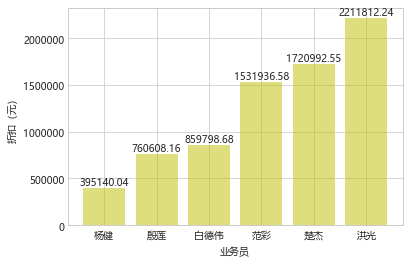

In [69]:
#5 折扣分析
df['折扣额']=df['折扣']*df['销售额']*df['数量']
#查看业务员的折扣额
disct= df['折扣额'].groupby(df['地区经理']).sum().sort_values()
plt.bar(disct.index,height=disct.values,width=0.8,alpha = 0.5,color = 'y')
plt.ylabel('折扣（元）')
plt.xlabel("业务员")
for a,b in zip(disct.index,disct.values): # 添加数据标签
    plt.text(a, b+0.05,'%.2f' % b, ha='center',va= 'bottom',fontsize=10)

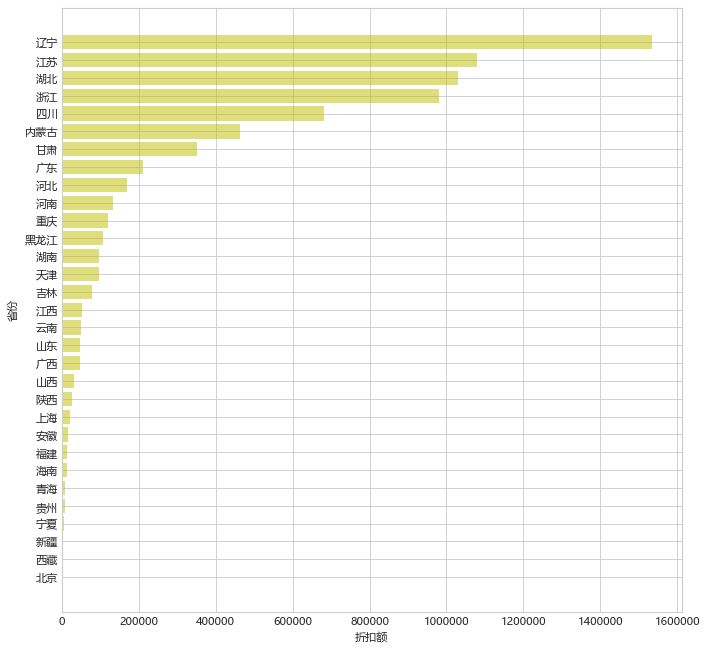

ConversionError: Failed to convert value(s) to axis units: '北京'

<Figure size 432x288 with 1 Axes>

In [73]:
#查看折扣最多的省份
disct_pro= df['折扣额'].groupby(df['省/自治区']).sum().sort_values()
plt.figure(figsize=(10,10), dpi= 80)
plt.barh(disct_pro.index,width=disct_pro.values,height=0.8,alpha = 0.5,color = 'y')
plt.ylabel('省份')
plt.xlabel("折扣额")
plt.show()
for a,b in zip(disct_pro.index,disct_pro.values): # 添加数据标签
   plt.text(a, b+0.05,'%.2f' % b, ha='center',va= 'bottom',fontsize=10)

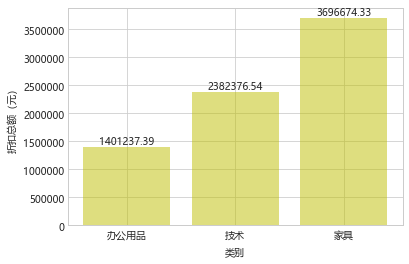

In [74]:
#折扣最多的类别
disct_kid= df['折扣额'].groupby(df['类别']).sum().sort_values()
plt.bar(disct_kid.index,height=disct_kid.values,width=0.8,alpha = 0.5,color = 'y')
plt.ylabel('折扣总额（元）')
plt.xlabel("类别")
for a,b in zip(disct_kid.index,disct_kid.values): # 添加数据标签
    plt.text(a, b+0.05,'%.2f' % b, ha='center',va= 'bottom',fontsize=10)


pandas.core.series.Series

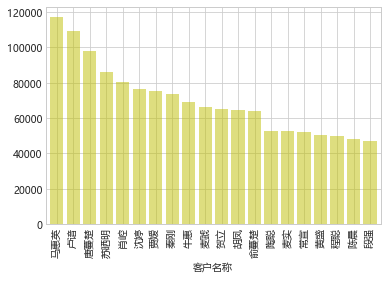

In [76]:
#收到折扣最多的用户
disct_clint= df['折扣额'].groupby(df['客户名称']).sum().sort_values(ascending=False)
tem3 = disct_clint[0:20,]
tem3.plot.bar(width=0.8,alpha = 0.5,color = "y")
type(tem3)


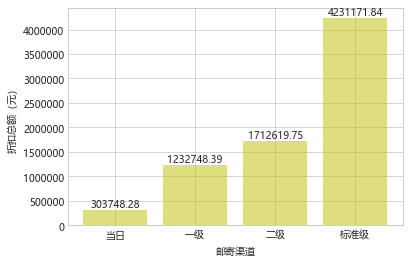

In [78]:
#折扣最多的邮寄渠道
disct_t= df['折扣额'].groupby(df['邮寄方式']).sum().sort_values()
plt.bar(disct_t.index,height=disct_t.values,width=0.8,alpha = 0.5,color = 'y')
plt.ylabel('折扣总额（元）')
plt.xlabel("邮寄渠道")
for a,b in zip(disct_t.index,disct_t.values): # 添加数据标签
    plt.text(a, b+0.05,'%.2f' % b, ha='center',va= 'bottom',fontsize=10)